In [1]:
%matplotlib notebook
import pandas as pd
from matplotlib import pyplot as pp
import seaborn as sns
import numpy as np
import json
from collections import defaultdict
from collections import Counter

# 3) US Baby Names 1880–2017

Podatki: http://www.ssa.gov/oact/babynames/limits.html.

In [2]:
!head -n 10 data/DATA_03_names/yob1880.txt

In [4]:
names1880=pd.read_csv('data/DATA_03_names/yob1880.txt',names=['ime','spol','stevilo'])
names1880.head()

,ime,spol,stevilo
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [6]:
names1881=pd.read_csv('data/DATA_03_names/yob1881.txt',names=['ime','spol','stevilo'])
names1881.head()

,ime,spol,stevilo
0,Mary,F,6919
1,Anna,F,2698
2,Emma,F,2034
3,Elizabeth,F,1852
4,Margaret,F,1658


In [14]:
years=range(1880,2018)
pieces=[]
columns=['ime','spol','stevilo']

In [15]:
for year in years:
    names_year=pd.read_csv('data/DATA_03_names/yob'+str(year)+'.txt',names=columns)
    names_year['leto']=year
    pieces.append(names_year)


In [16]:
len(pieces)

138

In [17]:
len(pieces[0])

2000

In [18]:
pieces[0].head()

,ime,spol,stevilo,leto
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [19]:
names=pd.concat(pieces,ignore_index=True)

In [21]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924665 entries, 0 to 1924664
Data columns (total 4 columns):
ime        object
spol       object
stevilo    int64
leto       int64
dtypes: int64(2), object(2)
memory usage: 58.7+ MB


In [25]:
total_births=names.pivot_table('stevilo','leto','spol',aggfunc='sum')
total_births.head()

spol,F,M
leto,,
1880,90993,110491
1881,91953,100743
1882,107847,113686
1883,112319,104627
1884,129020,114442


<IPython.core.display.Javascript object>


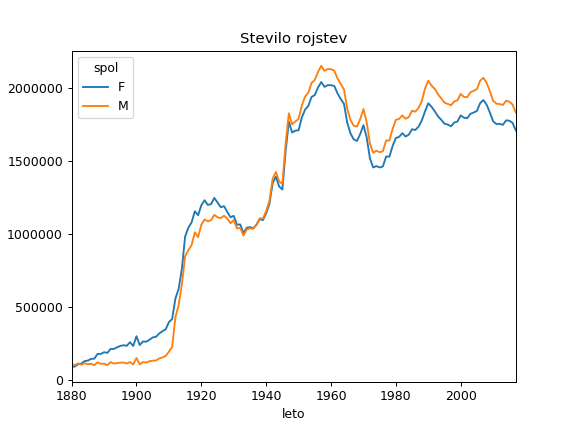

In [28]:
total_births.plot(title='Stevilo rojstev')

In [29]:
def add_prob(group):
    group['prob']=group['stevilo']/group['stevilo'].sum()
    return group


In [30]:
names=names.groupby(['leto','spol']).apply(add_prob)

In [31]:
names.head()

,ime,spol,stevilo,leto,prob
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [35]:
def get_top(group,n=1000):
    return group.sort_values(by='stevilo',ascending=False)[:n]

In [38]:
grouped=names.groupby(['leto','spol'])

In [43]:
topN=grouped.apply(get_top)
topN=topN.reset_index(drop=True)
topN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275877 entries, 0 to 275876
Data columns (total 5 columns):
ime        275877 non-null object
spol       275877 non-null object
stevilo    275877 non-null int64
leto       275877 non-null int64
prob       275877 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 10.5+ MB


In [45]:
boys=topN[topN['spol']=='M']
girls=topN[topN['spol']=='F']
boys.head()

,ime,spol,stevilo,leto,prob
942,John,M,9655,1880,0.087383
943,William,M,9532,1880,0.086269
944,James,M,5927,1880,0.053642
945,Charles,M,5348,1880,0.048402
946,George,M,5126,1880,0.046393


In [48]:
total_births=topN.pivot_table('stevilo','leto','ime',aggfunc='sum')
total_births.head()

ime,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,...,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri,Zyaire
leto,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,...,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,...,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,...,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN,NaN


In [55]:
subset=total_births[['John','Harry','Mary','Khaleesi','Jon','Arya']]

<IPython.core.display.Javascript object>


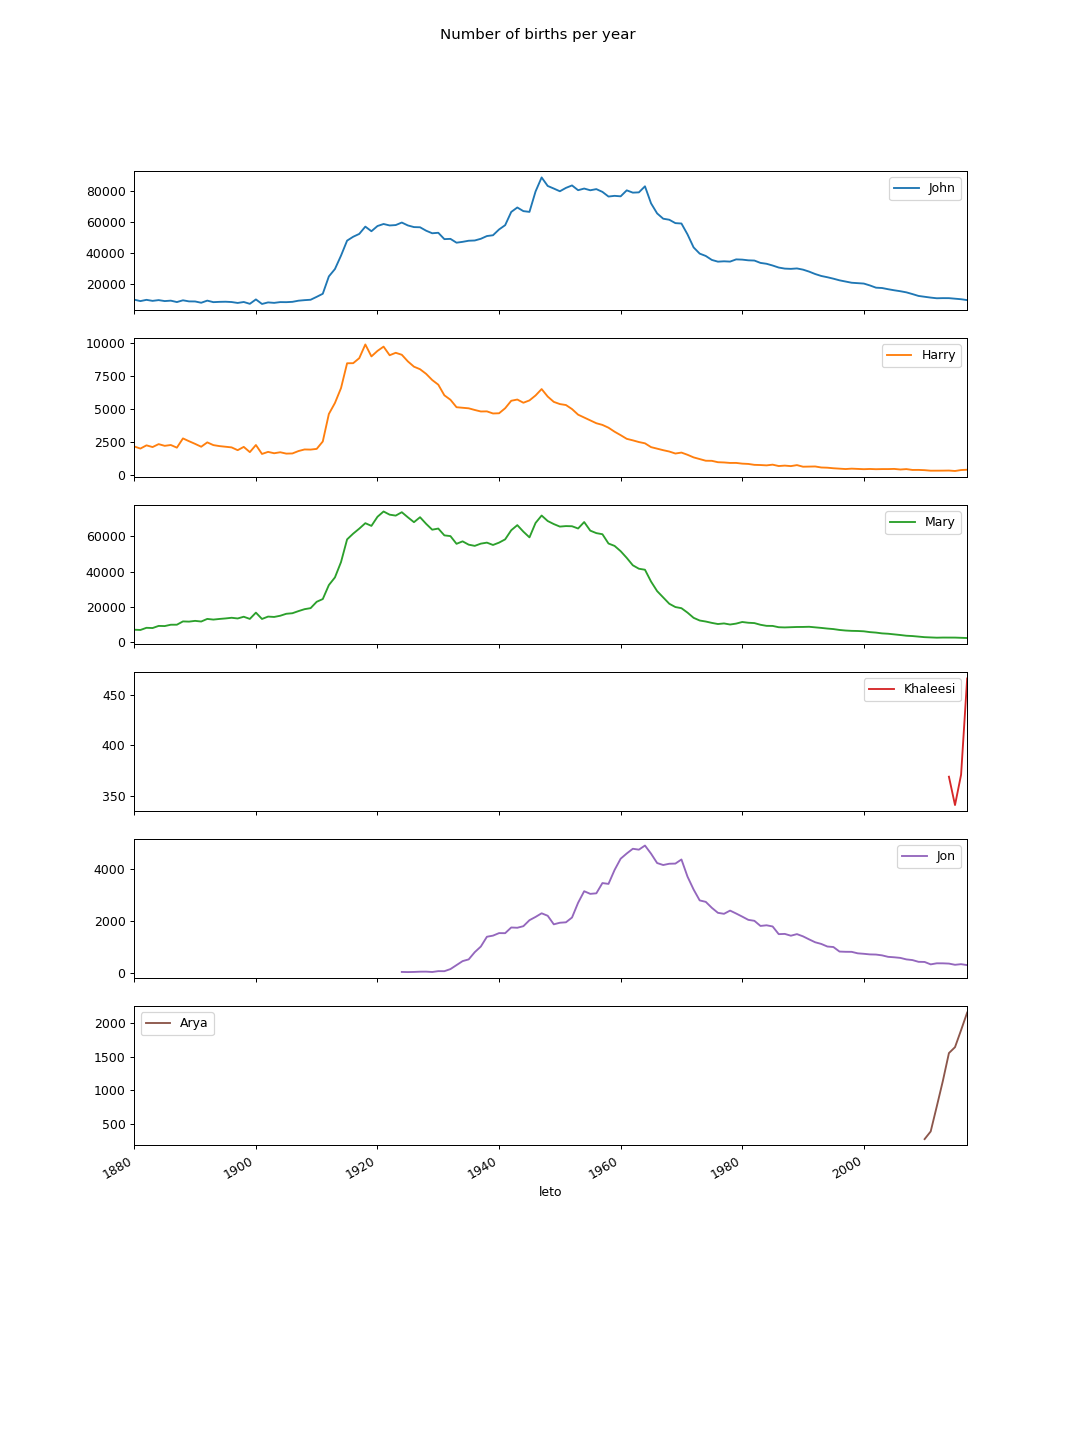

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0123cea400>,
      dtype=object)

In [56]:
subset.plot(subplots=True,figsize=[12,16],grid=False,title='Number of births per year')

In [59]:
table=topN.pivot_table('prob',index='leto',columns='spol',aggfunc='sum')

In [60]:
table.head()

spol,F,M
leto,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539


<IPython.core.display.Javascript object>


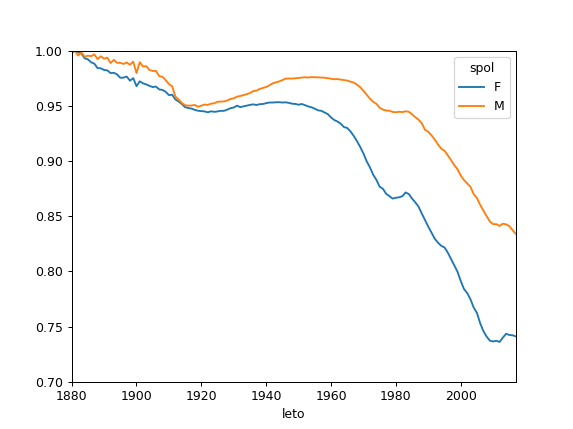

In [62]:
table.plot(ylim=[0.7,1])